<a href="https://colab.research.google.com/github/PranavKumarAV/The-Perfect-Job/blob/main/The_Perfect_Job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all the required libraries
from csv import reader
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn

In [ ]:
!gdown --id 1BWl6uXuorD2ZGvkGb81TkgdjHqhReU0o      #Importing the file from my google drive

Downloading...
From: https://drive.google.com/uc?id=1BWl6uXuorD2ZGvkGb81TkgdjHqhReU0o
To: /content/Final_Data.csv
100% 10.5k/10.5k [00:00<00:00, 22.3MB/s]


In [ ]:
# Reading the CSV file
def load_csv(filename):
	X = []
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for i in csv_reader:
			if not i:
				continue
			X.append(i)
	return X

In [ ]:
# Convert Input column to float
def input_col(X, n):
	for i in X:
		i[n] = float(i[n].strip())          # Removing all the White spaces in all rows of the particular column and to convert to float

# Convert Output column to integer
def output_col(X, n):
  class_values = [i[n] for i in X]      #Getting all the Class Values
  unique = set(class_values)            #Getting all the unique Class names
  global class_names
  class_names = {}                      #class_names stores the Class names and its corresponding number
  for i, value in enumerate(unique):    #Assigning values in class_names
    class_names[value] = i
  for i in X:                           #Converting Class names to its corresponding number
    i[n] = class_names[i[n]]
  return class_names                    #Returning the class names

In [ ]:
# Calculate the Euclidean distance between two vectors
def calc_distance(test, train):
	dist = 0.0                            #This represents the distance between the 2 rows
	for i in range(len(test)-1):          #Calculating distance
		dist += (test[i] - train[i])**2
	return sqrt(dist)                     #Returning the root of the distance value

#Getting the neighbors of the particular Row
def neighbors(train, test, num_neighbors):
  distance = []
  for row in train:
    dist = calc_distance(test, row)      #Calculating Euclidian distances
    distance.append([row[-1], dist])     #Appending the distance with its corresponding class number
  distance.sort(key=lambda x: x[1])      #Sorting "distances" based on its euclidian distance
  neighbors = []
  for i in range(num_neighbors):         #Saving only the n closest variables
    neighbors.append(distance[i][0])
  return neighbors

In [ ]:
#Predicting the Classes
def prediction(train, test_row, num_neighbors):
  neigh = neighbors(train, test_row, num_neighbors)    #Calculating the n closest neighbors
  predict = max(set(neigh), key=neigh.count)           #Obtaining the Maximum neighbor Class  
  return predict

#Testing the Model
def testing(X_train, X_test, y_test, num_neighbors):
  y_hat = []                                           #Will hold the Predicted class
  for row in X_test:                                   #To predict each data with our model
    label = prediction(X_train, row, num_neighbors)
    y_hat.append(label)
  y_tested = [i-j for i,j in zip(y_test,y_hat)]        #Subtracting Predicted value with actual value
  true_val = y_tested.count(0)                         #Checking how many are Predicted correctly
  tot_val = len(y_test)
  acc = (true_val/tot_val)*100                         #Calculating the Accuracy
  print("Accuracy of the model in testing is : {}".format(acc))

In [ ]:
#Getting the data
filename = 'Final_Data.csv'                
dataset = load_csv(filename)                #Importing the file for Predicting

#Getting only the values from the data 
X=[]
for i in range(len(dataset)-1):             #Storing the dataset in list format
  X.append(dataset[i+1][1:])

for i in range(len(X[0])-1):                #Converting numbers to float
  input_col(X, i)
  
output_col(X, len(X[0])-1)                  #convert class column to integers

num_neighbors = 5                           # define model parameter

In [ ]:
test = pd.read_csv(filename)                #Importing same data in different data structure for plotting

XX = test.loc[:,'Coding':'Electronics']     #Seperating Input and Output data for plotting
YY = test.loc[:,'Y']

#Converting Class names to Values for Testing
Y_values=[]
for i in YY:
  if i =='Technician':
    i=class_names[i]
  if i =='Customer Care':
    i=class_names[i]
  if i =='Software':
    i=class_names[i]
  if i =='Receptionist':
    i=class_names[i]
  if i =='Management':
    i=class_names[i]
  Y_values.append(i)

In [ ]:
#Separating the datas to train and test data
X_train, X_test, y_train, y_test = train_test_split(XX, Y_values, test_size = 0.3)

#Converting from Pandas DataFrame to List
X_train,X_test = X_train.values.tolist(),X_test.values.tolist()

#Combining X and Y datas of training
X_y_train = []
for i,j in zip(X_train,y_train):
  i.append(j)
  X_y_train.append(i)

In [ ]:
#Testing the Model
Metrices = testing(X_y_train,X_test,y_test,num_neighbors)

Accuracy of the model in testing is : 100.0


In [ ]:
pca_datas = PCA(n_components=2)             #Doing Dimensionality Reduction to plot 
pca_plot = pca_datas.fit_transform(XX)      #Fitting the data to plot

#Naming the columns of reduced data
pca_plot_Df = pd.DataFrame(data = pca_plot, columns = ['Principal Component 1', 'Principal Component 2'])
pca_plot_Df['y'] = YY                       #Including Y values in reduced data

pca_plot_Df.head()                          #Printing the 1st four values of Plotting data

,Principal Component 1,Principal Component 2,y
0,0.663892,0.006477,Receptionist
1,0.710901,0.003282,Receptionist
2,0.704728,-0.043793,Receptionist
3,0.685616,0.022754,Receptionist
4,0.688674,-0.016465,Receptionist


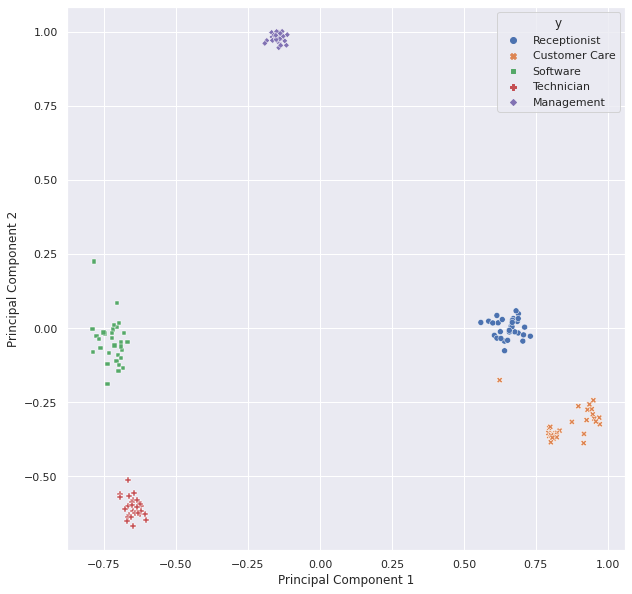

In [ ]:
#Plotting the points
seaborn.set(style='darkgrid')

plt.figure(figsize=(10,10))

g=seaborn.scatterplot(x="Principal Component 1", y="Principal Component 2",
                    hue="y",style="y",
                    data=pca_plot_Df)

In [ ]:
#Checking for a Particular model, Sample data for Management-[0.2,0.85,0.9,0.2,0.6,0.3,0.06,0.3,0.4,0.1]
print("Enter the 10 features")
row = []
for i in range(10):
  row.append(float(input()))

Enter the 10 features
0.2
0.85
0.9
0.2
0.6
0.3
0.06
0.3
0.4
0.1


In [ ]:
print(row)

[0.2, 0.85, 0.9, 0.2, 0.6, 0.3, 0.06, 0.3, 0.4, 0.1]


In [ ]:
#Predicting the label number
label = prediction(X, row, num_neighbors)

#Assigning the label number to its corresponding Class name  
for i,j in zip(class_names.keys(),class_names.values()):
  if j==label:
    class_label=i

print('So, with these features,the best suitable role for you is "%s"' % (class_label))

So, with these features,the best suitable role for you is "Management"
